<a href="https://colab.research.google.com/github/GreatLearningAIML1/delhi-may19-batch-Trapti04/blob/master/CNN_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
1.   Based on https://www.kaggle.com/c/plant-seedlings-classification problem
2.   Objective : 
        Classify an image of seedling into one the following 12 different seedling classes.

        Black-grass;
Charlock;
Cleavers;
Common Chickweed;
Common wheat;
Fat Hen;
Loose Silky-bent;
Maize;
Scentless Mayweed;
Shepherds Purse;
Small-flowered Cranesbill;
Sugar beet



In [1]:
!pip show tensorflow

Name: tensorflow
Version: 1.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: opt-einsum, google-pasta, astor, absl-py, tensorboard, wrapt, numpy, gast, termcolor, grpcio, keras-preprocessing, six, keras-applications, tensorflow-estimator, wheel, protobuf
Required-by: stable-baselines, magenta, fancyimpute


In [2]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 86.3MB 66kB/s 
     |████████████████████████████████| 450kB 47.3MB/s 
     |████████████████████████████████| 3.8MB 26.5MB/s 
     |████████████████████████████████| 81kB 10.2MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstall

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Load libraries required

In [0]:
# System related
import os
import csv # for writing to file
import itertools

#Image related
import cv2
import tensorflow.keras.preprocessing.image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

# Data handling
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalMaxPooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.models import load_model

# visualization

import matplotlib
import matplotlib.pyplot as plt

# metrics related
from sklearn.metrics import confusion_matrix



#Description:
The Plant Seedlings Dataset contains images of approximately 960 unique plants belonging to 12 species at several growth stages.It comprises annotated RGB images with a physical resolution of roughly 10 pixels per mm.

# Evaluation criteria
Submissions are evaluated on MeanFScore,
which at Kaggle is actually a micro-averaged F1-score.

Given positive/negative rates for each class k, the resulting score is computed this way:
$$Precision{micro} = \frac{\sum{k \in C} TPk}{\sum{k \in C} TPk + FPk}

Recall{micro} = \frac{\sum{k \in C} TPk}{\sum{k \in C} TPk + FNk}

F1−score is the harmonic mean of precision and recall
MeanFScore = F1{micro}= \frac{2 Precision{micro} Recall{micro}}{Precision{micro} + Recall_{micro}}$$.

fro wikipedia: The harmonic mean of the precision (true positives per predicted positive) and the recall (true positives per real positive) is often used as an aggregated performance score for the evaluation of algorithms and systems: the F-score (or F-measure). This is used in information retrieval because only the positive class is of relevance, while number of negatives, in general, is large and unknown.[12] It is thus a trade-off as to whether the correct positive predictions should be measured in relation to the number of predicted positives or the number of real positives, so it is measured versus a putative number of positives that is an arithmetic mean of the two possible denominators.

# Steps to solve
Step 1: load the data from my google drive- observe the dataset for imbalance ; nature of pictures to see what feature engineering might be required.

In [4]:
%ls "/content/drive/My Drive/Computer vision/Project1-CNN/train"
 

 Black-grass/        'Common wheat'/      'Scentless Mayweed'/
 Charlock/           'Fat Hen'/           'Shepherds Purse'/
 Cleavers/           'Loose Silky-bent'/  'Small-flowered Cranesbill'/
'Common Chickweed'/   Maize/              'Sugar beet'/


In [0]:
def classes_to_int(label):
    label = label.strip()
    if label == "Black-grass":  return 0
    if label == "Charlock":  return 1
    if label == "Cleavers":  return 2
    if label == "Common Chickweed":  return 3
    if label == "Common wheat":  return 4
    if label == "Fat Hen":  return 5
    if label == "Loose Silky-bent": return 6
    if label == "Maize":  return 7
    if label == "Scentless Mayweed": return 8
    if label == "Shepherds Purse": return 9
    if label == "Small-flowered Cranesbill": return 10
    if label == "Sugar beet": return 11
    print("Invalid Label", label)
    return 12

def int_to_classes(i):
    if i == 0: return "Black-grass"
    elif i == 1: return "Charlock"
    elif i == 2: return "Cleavers"
    elif i == 3: return "Common Chickweed"
    elif i == 4: return "Common wheat"
    elif i == 5: return "Fat Hen"
    elif i == 6: return "Loose Silky-bent"
    elif i == 7: return "Maize"
    elif i == 8: return "Scentless Mayweed"
    elif i == 9: return "Shepherds Purse"
    elif i == 10: return "Small-flowered Cranesbill"
    elif i == 11: return "Sugar beet"
    print("Invalid class ", i)
    return "Invalid Class"

In [0]:
HEIGHT = 128
WIDTH = 128

In [0]:
def readTrainData(trainDir):
    data = []
    labels = []
    
    # loop over the input images
    dirs = os.listdir(trainDir) 
    for dir in dirs:
        absDirPath = os.path.join(os.path.sep,trainDir, dir)
        images = os.listdir(absDirPath)
        for imageFileName in images:
            # load the image, pre-process it, and store it in the data list
            imageFullPath = os.path.join(trainDir, dir, imageFileName)
            #print(imageFullPath)
            img = load_img(imageFullPath)
            arr = img_to_array(img)  # Numpy array with shape (233,233,3)
            arr = cv2.resize(arr, (HEIGHT,WIDTH)) #Numpy array with shape (HEIGHT, WIDTH,3)
            #print(arr.shape) 
            data.append(arr)
            label = classes_to_int(dir)
            labels.append(label)
    return data, labels

In [0]:
X, Y = readTrainData("/content/drive/My Drive/Computer vision/Project1-CNN/train")

In [9]:
#see number of images in each label
images = np.array(X)
#Y_class = np.array([np.argmax(y, axis=None, out=None) for y in Y ])
classes = np.array(Y)
#print("images shape: ", X.shape)
#print("classes shape: ", Y_class.shape)
#for key,value in images_per_class.items():
   # print("number of {0} images is  -> {1}".format(key, len(value)))
  
for label in set(classes):

  print("number of {} images is  -> {}".format(
        label, 
        len(images[classes == label])))

number of 0 images is  -> 263
number of 1 images is  -> 390
number of 2 images is  -> 287
number of 3 images is  -> 611
number of 4 images is  -> 221
number of 5 images is  -> 475
number of 6 images is  -> 654
number of 7 images is  -> 221
number of 8 images is  -> 516
number of 9 images is  -> 231
number of 10 images is  -> 496
number of 11 images is  -> 385


Text(0.5, 0.98, 'Categorical Plotting')

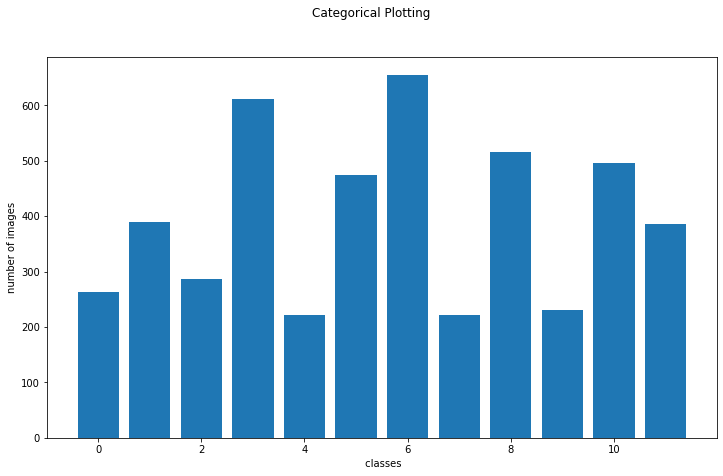

In [10]:
values =[]
labels=[]
for label in set(classes):
  values.append(len(images[classes == label]))
  labels.append(label)

fig, ax = plt.subplots(figsize=(12,7))
ax.bar(labels, values)
ax.set_xlabel(" classes")
ax.set_ylabel("number of images")
#axs[1].scatter(label, )
  #axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

Step 2: The classes are imbalanced and we need to see if we can under/ over sample to get over the imbalance  if it can deliver better accuracy. we will also  see what other improvements can be made to get better classification basis initial confustion matrix

In [0]:
X = np.array(X, dtype="float") / 255.0
Y = np.array(Y)
# convert the labels from integers to vectors
Y =  tensorflow.keras.utils.to_categorical(Y, num_classes=12)

In [0]:
# partition the data into training and testing splits using 75% training and 25% for validation
(trainX, valX, trainY, valY) = train_test_split(X,Y,test_size=0.25, random_state= 70)


In [0]:
#construct the image generator for data augmentation

aug = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
        shear_range=0.2,
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        fill_mode ="nearest")


In [0]:
NUM_CLASSES = 12
# we need images of same size so we convert them into the size
DEPTH = 3
inputShape = (WIDTH, HEIGHT, DEPTH)
# initialize number of epochs to train for, initial learning rate and batch size
EPOCHS = 40
INIT_LR = 1e-3
BS = 32

In [0]:
def createModel():
    model = Sequential()
    # first set of CONV => RELU => POOL layers
    # The CONV  layer will learn 32 convolution filters, each of which are 5×5.
    model.add(Conv2D(32, (5, 5), padding="same",activation = "relu", input_shape=inputShape))
      
    # second set of CONV => RELU => POOL layers
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.2))
    # third set of CONV => RELU => POOL layers
    #This time we are learning 64 convolutional filters rather than the 32 convolutional
    #filters as in the previous layer set. It’s common to see the number of CONV 
    #filters learned increase the deeper we go in the network architecture.
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.3))
    
    # 4th layer
 
    model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.4))
    # Flattening out the volume into a set of fully-connected layers
    # Take the output of the preceding MaxPooling2D layer and flatten it into a single vector.
    # This operation allows us to apply our dense/fully-connected layers.
    # Fully-connected layer contains 256 nodes which is passed through another 
    # nonlinear ReLU activation.
    model.add(GlobalMaxPooling2D())
    model.add(Flatten())
    
    model.add(Dense(300, activation = "relu"))
    model.add(Dropout(0.5))
    # softmax classifier
    # Another fully-connected layer, but this one is special — the number of nodes is equal 
    # to the number of classes  (i.e., the classes we want to recognize).
    # This Dense layer is then fed into our softmax classifier
    # which will yield the probability for each class.
    model.add(Dense(NUM_CLASSES, activation = "softmax"))
    model.summary()
    # returns our fully constructed deep learning + Keras image classifier 
    #opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
    opt = Adam(lr=INIT_LR)
    # use binary_crossentropy if there are two classes
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])



    return model

In [0]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)


In [0]:


# initialize the model
print("compiling model...")
#sys.stdout.flush()
model = createModel()
# train the network
print("training network...")
#sys.stdout.flush()
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS), \
    validation_data=(valX, valY), \
    steps_per_epoch=len(trainX) // BS, epochs=EPOCHS, verbose=1,\
    callbacks = [learning_rate_reduction])
# callbacks = [learning_rate_reduction]
# save the model to disk
print("Saving model to disk")
#sys.stdout.flush()
model.save("/tmp/1_model")

compiling model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 128, 128, 32)      2432      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 128, 128, 32)      25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None,

In [0]:
%matplotlib inline

In [0]:
# set the matplotlib backend so figures can be saved in the background
# plot the training loss and accuracy
print("Generating plots...")

matplotlib.use("Agg")
matplotlib.pyplot.style.use("ggplot")
matplotlib.pyplot.figure()
N = EPOCHS
matplotlib.pyplot.plot(np.arange(0, N), H.history["loss"], label="train_loss")
matplotlib.pyplot.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
matplotlib.pyplot.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
matplotlib.pyplot.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
matplotlib.pyplot.title("Training Loss and Accuracy on  crop classification")
matplotlib.pyplot.xlabel("Epoch #")
matplotlib.pyplot.ylabel("Loss/Accuracy")
matplotlib.pyplot.legend(loc="lower left")
matplotlib.pyplot.savefig("plot.png")


# Model Evaluation

In [0]:

fig, ax = plt.subplots(2,1 , figsize=(20,7))
ax[0].plot(H.history['loss'], color='b', label="Training loss")
ax[0].plot(H.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(H.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(H.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.savefig("loss-acc-plot.png")


In [0]:
def readTestData(testDir):
    data = []
    filenames = []
    # loop over the input images
    images = os.listdir(testDir)
    for imageFileName in images:
        # load the image, pre-process it, and store it in the data list
        imageFullPath = os.path.join(testDir, imageFileName)
        #print(imageFullPath)
        img = load_img(imageFullPath)
        arr = img_to_array(img)  # Numpy array with shape (...,..,3)
        arr = cv2.resize(arr, (HEIGHT,WIDTH)) 
        data.append(arr)
        filenames.append(imageFileName)
    return data, filenames

In [0]:
# read test data and find its classification
testX, filenames = readTestData("/content/drive/My Drive/Computer vision/Project1-CNN/test")
# scale the raw pixel intensities to the range [0, 1]
testX = np.array(testX, dtype="float") / 255.0

In [0]:

mymodel = load_model('/tmp/1_model')
yFit = mymodel.predict(testX, batch_size=10, verbose=1)


In [0]:
 
with open('output.csv', 'w', newline='') as csvfile:
    fieldnames = ['file', 'species']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for index, file in enumerate(filenames):
        classesProbs = yFit[index]
        maxIdx = 0
        maxProb = 0;
        for idx in range(0,11):
            if(classesProbs[idx] > maxProb):
                maxIdx = idx
                maxProb = classesProbs[idx]
        writer.writerow({'file': file, 'species': int_to_classes(maxIdx)})
print("Writing complete")

In [0]:

plt.subplots(figsize=(22,7)) #set the size of the plot 

def plot_confusion_matrix(cm, classes,
                          normalize= False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig("confusion_matrix.png")


# Predict the values from the validation dataset
Y_pred = model.predict(valX)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred ,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(valY,axis = 1) 
# compute the confusion matrix

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(NUM_CLASSES))

In [0]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9', 'class 10', 'class 11']
print(classification_report(Y_true, Y_pred_classes, target_names=target_names))

Observations on various runs:

Itr 1: used RGB and 128 by 128 pixel images, no feature egineering. model used was basic with 2 Conv2D and 2 max pooling layers. accuracy achieved  0.77 with Lr 0.001 and decay as 0.001/15[15= number of epochs]

Itr 2; repeating with same  but epochs are 30. accuracy increases to 0.7980. F1 score = 0.80

Itr3: Learning rate reduction on Plateau and epochs 50. F1 accuarcy increased to 0.87

Itr4: Image resize has 256 * 256 rather than 128 * 128 - result errors out due to RAm limitation with TPU on colab.  errors out at 200 * 200 as well. Hence moving it back to 128 * 128, only item introduced was reducing learnng rate on plateau and no. of epochs reduced to 40. F1 accuarcy was 0.79.
Itr5: same as Itr4 but with the last Dense layer having 500 neurons instead of 256.

itr 5:  modified the model definition to include 2 additional Conv2D layers with more drop outs at each layer. no of epochs are 40

itr6: With prepocessing of images


